<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

##Daniel Yohanis Oematan - 0706022210060

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [24]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


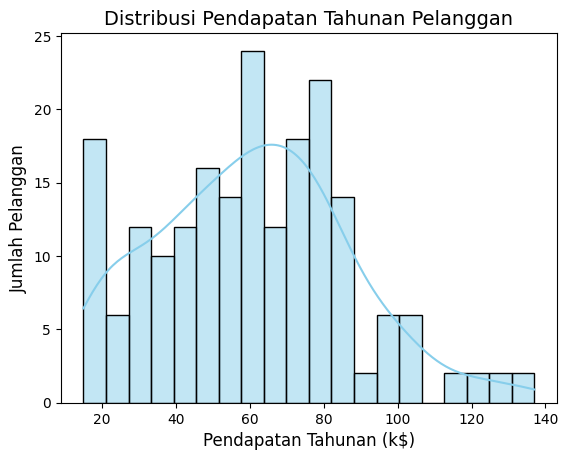

Histogram ini akan menunjukkan bagaimana pendapatan tahunan pelanggan tersebar dalam dataset. 
Dengan menambahkan kde (kernel density estimate), kita mendapatkan gambaran yang lebih halus tentang distribusi tersebut.


In [28]:
# make an insightful visualization and explain
sns.histplot(data=df, x='AnnualIncome', kde=True, color='skyblue', bins=20)

plt.title('Distribusi Pendapatan Tahunan Pelanggan', fontsize=14)
plt.xlabel('Pendapatan Tahunan (k$)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()

print('Histogram ini akan menunjukkan bagaimana pendapatan tahunan pelanggan tersebar dalam dataset. \nDengan menambahkan kde (kernel density estimate), kita mendapatkan gambaran yang lebih halus tentang distribusi tersebut.')

<ipython-input-29-33dacd66f44d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')


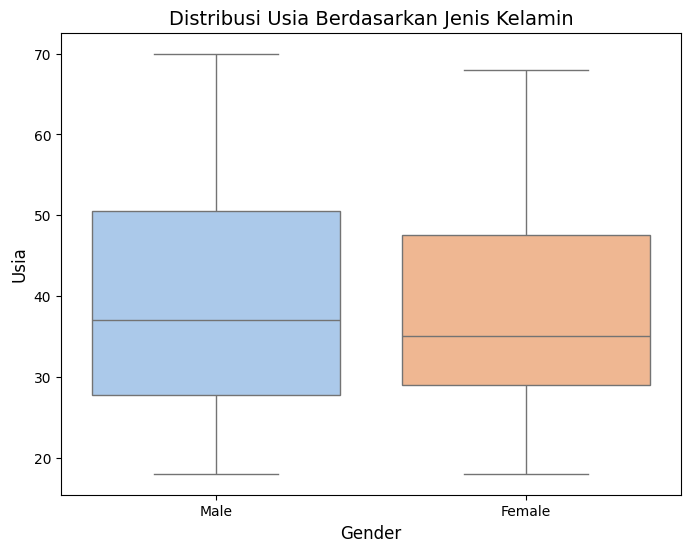

Visualisasi ini menunjukkan distribusi usia pelanggan berdasarkan jenis kelamin. 
Plot ini memperlihatkan variasi usia pelanggan antara laki-laki dan perempuan. 
Dari sini, kita bisa mengamati median usia, rentang antar kuartil (IQR), dan potensi outlier (usia yang tidak umum).
Ini bermanfaat untuk memahami segmentasi usia yang dominan di antara kelompok pelanggan pria dan wanita, yang dapat digunakan dalam strategi pemasaran yang lebih tepat sasaran


In [29]:
# make an insightful visualization and explain
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')

plt.title('Distribusi Usia Berdasarkan Jenis Kelamin', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.show()

print('Visualisasi ini menunjukkan distribusi usia pelanggan berdasarkan jenis kelamin. \nPlot ini memperlihatkan variasi usia pelanggan antara laki-laki dan perempuan. \nDari sini, kita bisa mengamati median usia, rentang antar kuartil (IQR), dan potensi outlier (usia yang tidak umum).\nIni bermanfaat untuk memahami segmentasi usia yang dominan di antara kelompok pelanggan pria dan wanita, yang dapat digunakan dalam strategi pemasaran yang lebih tepat sasaran')

## Data Preprocessing

For this case study, we only use income and spending score

In [30]:
# create new dataframe that consist only annual income and spending score

df_new = df[['AnnualIncome', 'SpendingScore']]
df_new.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [31]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(scaled_data, columns=['AnnualIncome', 'SpendingScore'])
df_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [32]:
# get stastical information on the new dataset

df_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

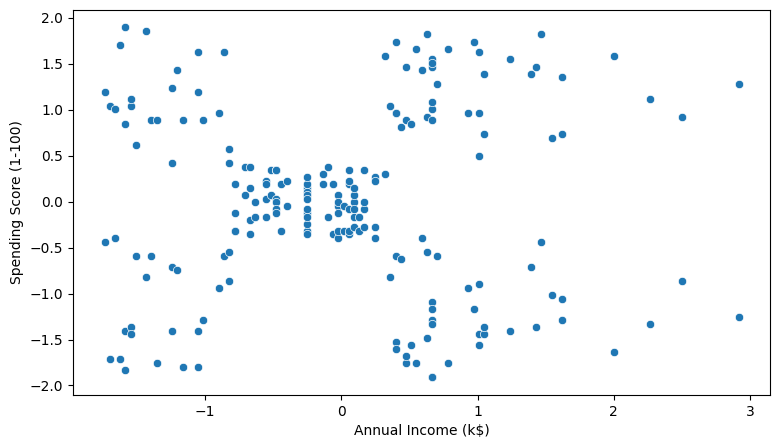

In [33]:
# Visualize the position
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df_scaled, x='AnnualIncome', y='SpendingScore')

plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Spending Score (1-100)', fontsize=10)
plt.show()

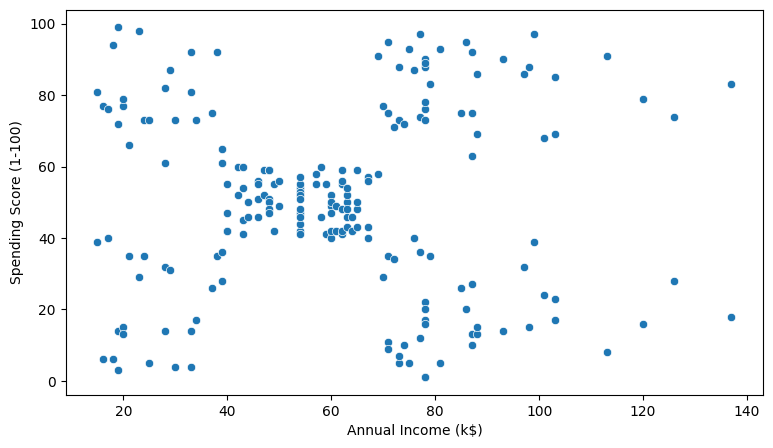

In [34]:
# Visualize the position using the original scale
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df_new, x='AnnualIncome', y='SpendingScore')

plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Spending Score (1-100)', fontsize=10)
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [35]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

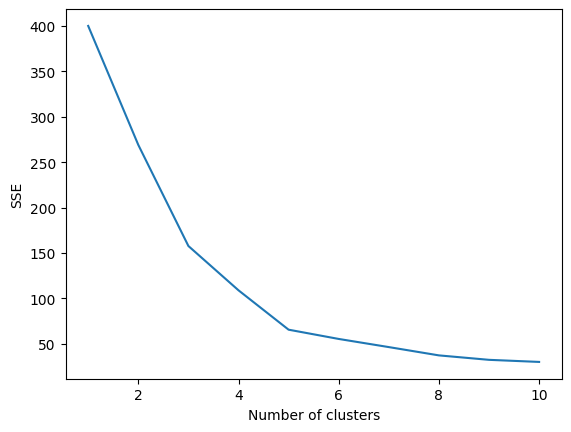

In [36]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [37]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [38]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

<ipython-input-39-85a066971d42>:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue","pink","green","purple"], data=df_scaled, s = 60)


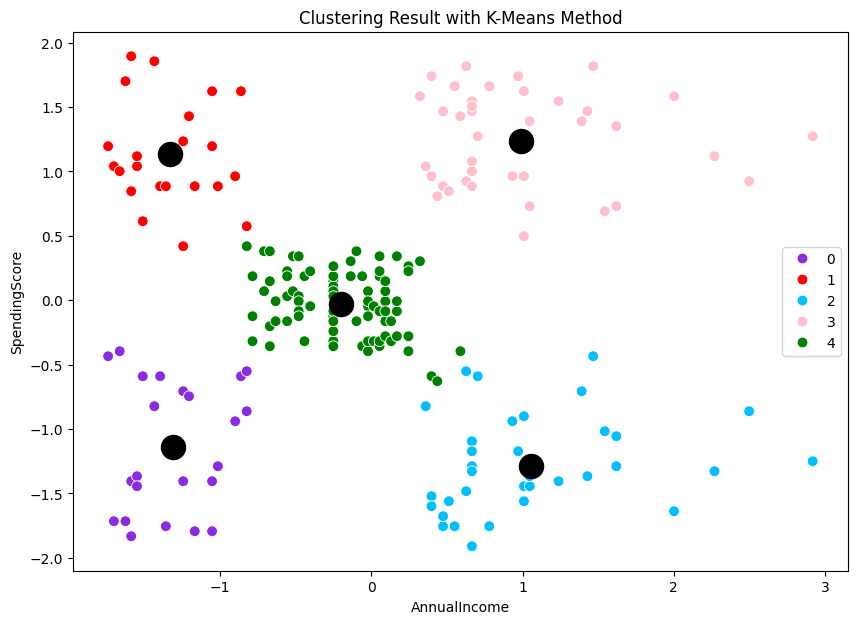

In [39]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue","pink","green","purple"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [40]:
# Inverse transform the scaled data to get the original values
df_scaled = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=["AnnualIncome", "SpendingScore"])
df_scaled['Cluster'] = y_pred
df_scaled.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [45]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_scaled.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'],'AnnualIncome': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Tentu, berikut adalah interpretasi hasil klustering dan rekomendasi yang disesuaikan dengan warna kluster sesuai gambar yang Anda berikan:

### Interpretasi Hasil Klustering:
- **Kluster 0 (Ungu)**: Pelanggan dalam kluster ini memiliki pendapatan tahunan yang rendah hingga sedang, tetapi tingkat pengeluaran yang sangat rendah. Mereka mungkin termasuk pelanggan yang tidak terlalu tertarik untuk melakukan banyak pembelanjaan.
- **Kluster 1 (Merah)**: Kluster ini memiliki pendapatan rendah hingga menengah dengan tingkat pengeluaran yang tinggi. Ini menunjukkan bahwa, meskipun pendapatan mereka tidak terlalu besar, mereka memiliki kebiasaan belanja yang tinggi. Perusahaan dapat menganggap mereka sebagai pelanggan potensial untuk promosi dan diskon.
- **Kluster 2 (Hijau)**: Pelanggan di kluster ini memiliki pendapatan tahunan sedang hingga tinggi, tetapi pengeluaran mereka moderat. Mereka cenderung hemat meskipun memiliki penghasilan yang lebih tinggi. Penawaran produk premium atau program loyalitas bisa menarik bagi mereka.
- **Kluster 3 (Merah Muda)**: Kelompok ini memiliki pendapatan tinggi, tetapi pengeluarannya cukup moderat. Mereka cenderung lebih selektif dalam berbelanja meskipun memiliki kapasitas penghasilan yang tinggi. Program loyalitas dan produk yang memberi nilai lebih bisa menjadi daya tarik.
- **Kluster 4 (Biru)**: Kelompok ini memiliki pendapatan dan pengeluaran yang tinggi. Mereka adalah pelanggan potensial untuk produk-produk eksklusif dan layanan premium.

### Rekomendasi untuk Perusahaan:
1. **Personalisasi Penawaran**: Berdasarkan karakteristik setiap kluster, perusahaan bisa menawarkan promosi yang lebih spesifik. Misalnya, kluster dengan pengeluaran tinggi dapat diberi diskon khusus atau reward untuk meningkatkan loyalitas.
   
2. **Strategi Pemasaran Berdasarkan Profil Kluster**: Mengembangkan strategi pemasaran yang spesifik untuk masing-masing kluster. Kluster berpenghasilan rendah bisa difokuskan pada produk yang ekonomis, sedangkan kluster berpenghasilan tinggi bisa menerima penawaran produk premium.

3. **Analisis Kebutuhan Kluster**: Mengidentifikasi kebutuhan utama tiap kluster untuk menyesuaikan produk dan strategi layanan yang sesuai.

4. **Program Loyalitas**: Menerapkan program loyalitas untuk kluster dengan pengeluaran tinggi agar mereka lebih sering berbelanja di perusahaan.

5. **Optimasi Kampanye Promosi**: Menggunakan informasi dari klustering ini untuk menyesuaikan kampanye promosi. Iklan dan promosi bisa lebih efektif jika disesuaikan dengan profil demografi dan preferensi tiap kluster.

Dengan memahami karakteristik masing-masing kluster, perusahaan dapat lebih tepat dalam menawarkan produk dan merancang strategi pemasaran yang sesuai untuk meningkatkan kepuasan dan loyalitas pelanggan.

<write here>